# 데이터 전처리

## 라이브러리 import

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
import os, random, time, gc, warnings

from tqdm import tqdm_notebook

import lightgbm as lgbm
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import RFECV


from sklearn.cluster import KMeans

from datetime import datetime

from math import sqrt

warnings.filterwarnings('ignore')

pd.set_option('max_columns', 500)
pd.set_option('max_rows', 500)

%matplotlib inline

In [10]:
df=pd.read_csv('D:\\test2\\Prototype.csv')
print(df.shape)
df.head()

(100, 11)


,ID,Uid,ProductNum,CycleState,completed,MCIn1,MCOut1,MCln2,MCOut2,MCIn3,MCOut3
0,1,a1,0.392998,1,1,11:31,11:44,11:51,12:06,12:13,12:28
1,2,a2,0.166121,1,1,11:31,11:44,11:51,12:06,12:13,12:28
2,3,a3,0.005654,1,1,11:32,11:45,11:52,12:07,12:14,12:29
3,4,a4,0.530299,1,1,11:33,11:46,11:54,12:08,12:15,12:30
4,5,a5,0.408468,1,1,11:34,11:47,11:55,12:09,12:16,12:31


In [11]:
df.describe()

,ID,ProductNum,CycleState,completed
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,0.499222,2.020000,0.740000
std,29.011492,0.277949,1.189007,0.440844
min,1.000000,0.005654,1.000000,0.000000
25%,25.750000,0.247291,1.000000,0.000000
50%,50.500000,0.500019,2.000000,1.000000
75%,75.250000,0.727823,2.250000,1.000000
max,100.000000,0.997704,5.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          100 non-null    int64  
 1   Uid         100 non-null    object 
 2   ProductNum  100 non-null    float64
 3   CycleState  100 non-null    int64  
 4   completed   100 non-null    int64  
 5   MCIn1       100 non-null    object 
 6   MCOut1      100 non-null    object 
 7   MCln2       100 non-null    object 
 8   MCOut2      100 non-null    object 
 9   MCIn3       100 non-null    object 
 10  MCOut3      100 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 8.7+ KB


In [12]:
n=df.isnull().sum()
n

ID            0
Uid           0
ProductNum    0
CycleState    0
completed     0
MCIn1         0
MCOut1        0
MCln2         0
MCOut2        0
MCIn3         0
MCOut3        0
dtype: int64

In [13]:
drop_column=['ID', 'ProductNum']
df_dropped=df.drop(drop_column, axis=1, inplace=False)

In [14]:
df_dropped

,Uid,CycleState,completed,MCIn1,MCOut1,MCln2,MCOut2,MCIn3,MCOut3
0,a1,1,1,11:31,11:44,11:51,12:06,12:13,12:28
1,a2,1,1,11:31,11:44,11:51,12:06,12:13,12:28
2,a3,1,1,11:32,11:45,11:52,12:07,12:14,12:29
3,a4,1,1,11:33,11:46,11:54,12:08,12:15,12:30
4,a5,1,1,11:34,11:47,11:55,12:09,12:16,12:31
5,b1,2,1,11:35,11:49,11:56,12:10,12:17,12:32
6,b2,1,1,11:36,11:50,11:57,12:11,12:18,12:33
7,b3,2,1,11:37,11:51,11:58,12:12,12:19,12:34
8,b4,2,1,11:38,11:52,11:59,12:13,12:20,12:35
9,b5,2,1,11:39,11:53,12:00,12:14,12:22,12:36


<AxesSubplot:xlabel='MCOut1', ylabel='MCOut3'>

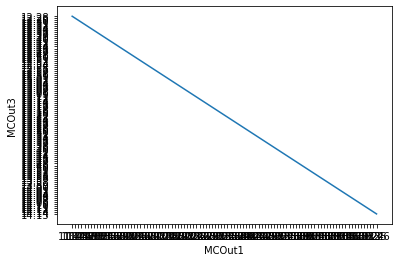

In [16]:
sns.lineplot(data=df_dropped, x="MCOut1", y="MCOut3")

In [41]:
#문자열을 datetime 타입으로 변경
#dateval1 = time.strptime("25-01-2013 00:00:03:238", "%d-%m-%Y %H:%M:%S:%f")
df_dropped['MCIn1'] = pd.to_datetime(df_dropped['MCIn1'], format="%H:%M")
df_dropped['MCOut1'] = pd.to_datetime(df_dropped['MCOut1'], format="%H:%M")
df_dropped['MCln2'] = pd.to_datetime(df_dropped['MCln2'], format="%H:%M")
df_dropped['MCOut2'] = pd.to_datetime(df_dropped['MCOut2'], format="%H:%M")
df_dropped['MCIn3'] = pd.to_datetime(df_dropped['MCIn3'], format="%H:%M")
df_dropped['MCOut3'] = pd.to_datetime(df_dropped['MCOut3'], format="%H:%M")

In [42]:
df_dropped_NotCompleted = df_dropped[df_dropped['completed'] == 0]

In [43]:
df_dropped_NotCompleted

,Uid,CycleState,completed,MCIn1,MCOut1,MCln2,MCOut2,MCIn3,MCOut3
12,c3,3,0,1900-01-01 11:42:00,1900-01-01 11:56:00,1900-01-01 12:03:00,1900-01-01 12:17:00,1900-01-01 12:25:00,1900-01-01 12:40:00
13,c4,3,0,1900-01-01 11:43:00,1900-01-01 11:57:00,1900-01-01 12:04:00,1900-01-01 12:18:00,1900-01-01 12:26:00,1900-01-01 12:41:00
14,c5,3,0,1900-01-01 11:44:00,1900-01-01 11:58:00,1900-01-01 12:05:00,1900-01-01 12:20:00,1900-01-01 12:27:00,1900-01-01 12:42:00
15,d1,2,0,1900-01-01 11:45:00,1900-01-01 11:59:00,1900-01-01 12:06:00,1900-01-01 12:21:00,1900-01-01 12:28:00,1900-01-01 12:43:00
16,d2,4,0,1900-01-01 11:46:00,1900-01-01 12:00:00,1900-01-01 12:07:00,1900-01-01 12:22:00,1900-01-01 12:29:00,1900-01-01 12:44:00
17,d3,4,0,1900-01-01 11:47:00,1900-01-01 12:01:00,1900-01-01 12:08:00,1900-01-01 12:23:00,1900-01-01 12:30:00,1900-01-01 12:45:00
18,d4,4,0,1900-01-01 11:48:00,1900-01-01 12:02:00,1900-01-01 12:09:00,1900-01-01 12:24:00,1900-01-01 12:31:00,1900-01-01 12:46:00
19,d5,2,0,1900-01-01 11:49:00,1900-01-01 12:03:00,1900-01-01 12:10:00,1900-01-01 12:25:00,1900-01-01 12:32:00,1900-01-01 12:47:00
20,e1,4,0,1900-01-01 11:50:00,1900-01-01 12:04:00,1900-01-01 12:11:00,1900-01-01 12:26:00,1900-01-01 12:33:00,1900-01-01 12:48:00
21,e2,2,0,1900-01-01 11:51:00,1900-01-01 12:05:00,1900-01-01 12:12:00,1900-01-01 12:27:00,1900-01-01 12:34:00,1900-01-01 12:50:00


In [44]:
# 로그 데이터를 이용해 공정 내 제품 위치를 파악할 수 있는 로직 구현
# M1Buffer, M1~M2Conveyor, M2Buffer, M2~M3Conveyor, M3Buffer, (M3~M1Conveyor)

In [45]:
# index 38번째 들어오는 제품의 M3Out3 시간 기록
# 이것이 target variable

In [46]:
# 제품 위치 파악 => 그 다음 들어오는 제품의 M3Out 시간
# 이것이 한개의 데이터 셋

In [47]:
# 방법 2
# 단순히 한 개의 제품을 추척해 M1In ~ M3Out 시간 취합
# 취합된 데이터로 분석

In [48]:
df_dropped['target'] = df_dropped['MCOut3'] - df_dropped['MCIn1']

In [50]:
df_dropped['target'].head()

0   0 days 00:57:00
1   0 days 00:57:00
2   0 days 00:57:00
3   0 days 00:57:00
4   0 days 00:57:00
Name: target, dtype: timedelta64[ns]

In [53]:
df_dropped

,Uid,CycleState,completed,MCIn1,MCOut1,MCln2,MCOut2,MCIn3,MCOut3,target
0,a1,1,1,1900-01-01 11:31:00,1900-01-01 11:44:00,1900-01-01 11:51:00,1900-01-01 12:06:00,1900-01-01 12:13:00,1900-01-01 12:28:00,0 days 00:57:00
1,a2,1,1,1900-01-01 11:31:00,1900-01-01 11:44:00,1900-01-01 11:51:00,1900-01-01 12:06:00,1900-01-01 12:13:00,1900-01-01 12:28:00,0 days 00:57:00
2,a3,1,1,1900-01-01 11:32:00,1900-01-01 11:45:00,1900-01-01 11:52:00,1900-01-01 12:07:00,1900-01-01 12:14:00,1900-01-01 12:29:00,0 days 00:57:00
3,a4,1,1,1900-01-01 11:33:00,1900-01-01 11:46:00,1900-01-01 11:54:00,1900-01-01 12:08:00,1900-01-01 12:15:00,1900-01-01 12:30:00,0 days 00:57:00
4,a5,1,1,1900-01-01 11:34:00,1900-01-01 11:47:00,1900-01-01 11:55:00,1900-01-01 12:09:00,1900-01-01 12:16:00,1900-01-01 12:31:00,0 days 00:57:00
5,b1,2,1,1900-01-01 11:35:00,1900-01-01 11:49:00,1900-01-01 11:56:00,1900-01-01 12:10:00,1900-01-01 12:17:00,1900-01-01 12:32:00,0 days 00:57:00
6,b2,1,1,1900-01-01 11:36:00,1900-01-01 11:50:00,1900-01-01 11:57:00,1900-01-01 12:11:00,1900-01-01 12:18:00,1900-01-01 12:33:00,0 days 00:57:00
7,b3,2,1,1900-01-01 11:37:00,1900-01-01 11:51:00,1900-01-01 11:58:00,1900-01-01 12:12:00,1900-01-01 12:19:00,1900-01-01 12:34:00,0 days 00:57:00
8,b4,2,1,1900-01-01 11:38:00,1900-01-01 11:52:00,1900-01-01 11:59:00,1900-01-01 12:13:00,1900-01-01 12:20:00,1900-01-01 12:35:00,0 days 00:57:00
9,b5,2,1,1900-01-01 11:39:00,1900-01-01 11:53:00,1900-01-01 12:00:00,1900-01-01 12:14:00,1900-01-01 12:22:00,1900-01-01 12:36:00,0 days 00:57:00


In [59]:
# 범주형 데이터 변환

df_dropped_ohe = pd.get_dummies(df_dropped, columns=['Uid','CycleState', 'completed'])
df_dropped_ohe.head()

,MCIn1,MCOut1,MCln2,MCOut2,MCIn3,MCOut3,target,Uid_a1,Uid_a2,Uid_a3,Uid_a4,Uid_a5,Uid_b1,Uid_b2,Uid_b3,Uid_b4,Uid_b5,Uid_c1,Uid_c2,Uid_c3,Uid_c4,Uid_c5,Uid_d1,Uid_d2,Uid_d3,Uid_d4,Uid_d5,Uid_e1,Uid_e2,Uid_e3,Uid_e4,Uid_e5,CycleState_1,CycleState_2,CycleState_3,CycleState_4,CycleState_5,completed_0,completed_1
0,1900-01-01 11:31:00,1900-01-01 11:44:00,1900-01-01 11:51:00,1900-01-01 12:06:00,1900-01-01 12:13:00,1900-01-01 12:28:00,0 days 00:57:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1900-01-01 11:31:00,1900-01-01 11:44:00,1900-01-01 11:51:00,1900-01-01 12:06:00,1900-01-01 12:13:00,1900-01-01 12:28:00,0 days 00:57:00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1900-01-01 11:32:00,1900-01-01 11:45:00,1900-01-01 11:52:00,1900-01-01 12:07:00,1900-01-01 12:14:00,1900-01-01 12:29:00,0 days 00:57:00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1900-01-01 11:33:00,1900-01-01 11:46:00,1900-01-01 11:54:00,1900-01-01 12:08:00,1900-01-01 12:15:00,1900-01-01 12:30:00,0 days 00:57:00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1900-01-01 11:34:00,1900-01-01 11:47:00,1900-01-01 11:55:00,1900-01-01 12:09:00,1900-01-01 12:16:00,1900-01-01 12:31:00,0 days 00:57:00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [54]:
# 평가함수 정의

from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error=(log_y - log_pred)**2
    rmsle=np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [60]:
# 데이터 분할
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = df_dropped_ohe['target']
X_features = df_dropped_ohe.drop(['target'],axis=1,inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train, y_train)
pred=lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

TypeError: invalid type promotion